In [1]:
import numpy as np
import pandas as pd


# Read the Data

In [2]:
data = pd.read_csv("spam (3).csv",encoding='latin1')
data.head(3)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN


In [3]:
data.shape

(5572, 5)

# Data Cleaning

In [4]:
data.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [5]:
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.rename(columns={"v1":"target","v2":"text"},inplace=True)

In [7]:
data.sample(2)

,target,text
3849,ham,I to am looking forward to all the sex cuddlin...
2780,ham,Long after I quit. I get on only like 5 minute...


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
data.target=encoder.fit_transform(data["target"])

In [10]:
data.sample(2)

,target,text
5552,0,Have a safe trip to Nigeria. Wish you happines...
335,0,"Ta-Daaaaa! I am home babe, are you still up ?"


In [11]:
data.isnull().sum()

target    0
text      0
dtype: int64

In [12]:
data.duplicated().sum()

403

In [13]:
data=data.drop_duplicates(keep="first")

In [14]:
data.shape

(5169, 2)

# EDA

In [15]:
data.target.value_counts()

target
0    4516
1     653
Name: count, dtype: int64

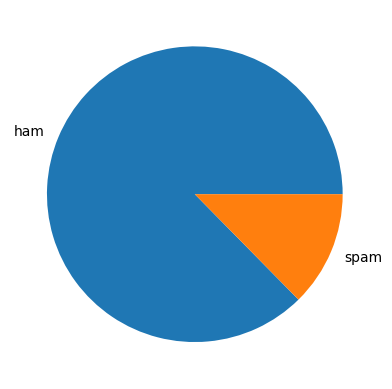

In [16]:
import matplotlib.pyplot as plt
plt.pie(data.target.value_counts(),labels=["ham","spam"])
plt.show()

In [17]:
import nltk

In [18]:
nltk.download("punkt")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\NITHIISH\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
data["num_charac"] = data.text.apply(len)

In [20]:
data.head()

,target,text,num_charac
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [21]:
# fetch the number of words
data["num_words"]=data.text.apply(lambda x:len(nltk.word_tokenize(x)))

In [22]:
data.head(2)

,target,text,num_charac,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8


In [23]:
data["sen_len"]=data.text.apply(lambda x:len(nltk.sent_tokenize(x)))

In [24]:
data.head(4)

,target,text,num_charac,num_words,sen_len
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1


In [25]:
data[["num_charac","num_words","sen_len"]].describe()

,num_charac,num_words,sen_len
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [26]:
# ham 
data[data.target == 0][["num_charac","num_words","sen_len"]].describe()

,num_charac,num_words,sen_len
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [27]:
# spam
data[data.target == 1][["num_charac","num_words","sen_len"]].describe()

,num_charac,num_words,sen_len
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [28]:
import seaborn as sns


<Axes: xlabel='num_charac', ylabel='Count'>

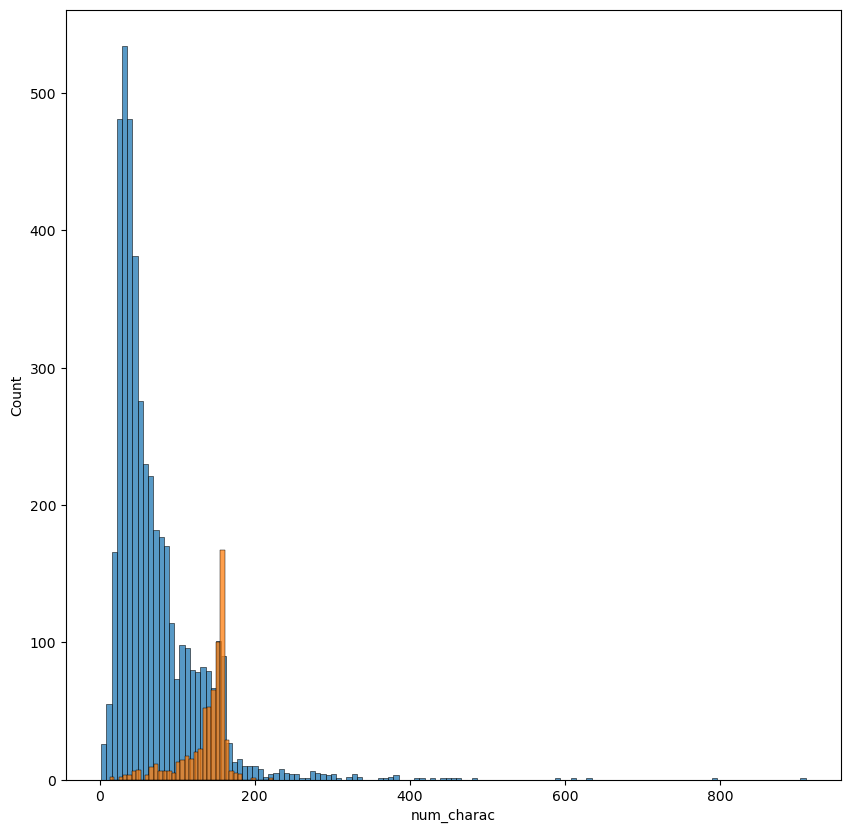

In [29]:
plt.figure(figsize=(10,10))
sns.histplot(data[data.target==0]["num_charac"])
sns.histplot(data[data.target==1]["num_charac"])

<Axes: xlabel='num_words', ylabel='Count'>

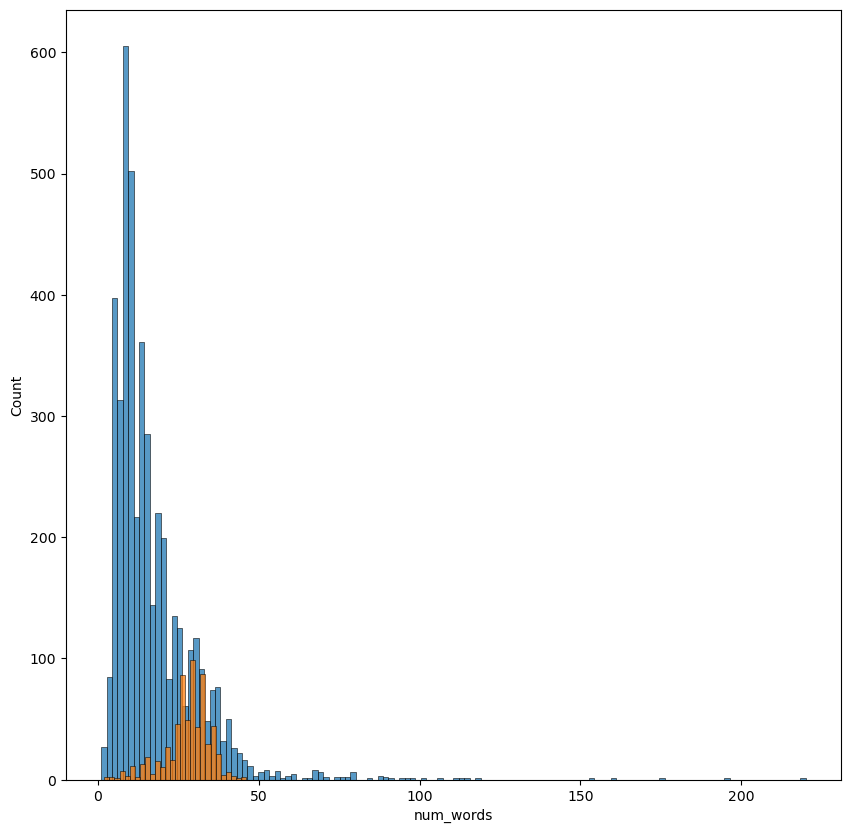

In [30]:
plt.figure(figsize=(10,10))
sns.histplot(data[data.target==0]["num_words"])
sns.histplot(data[data.target==1]["num_words"])

C:\Users\NITHIISH\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


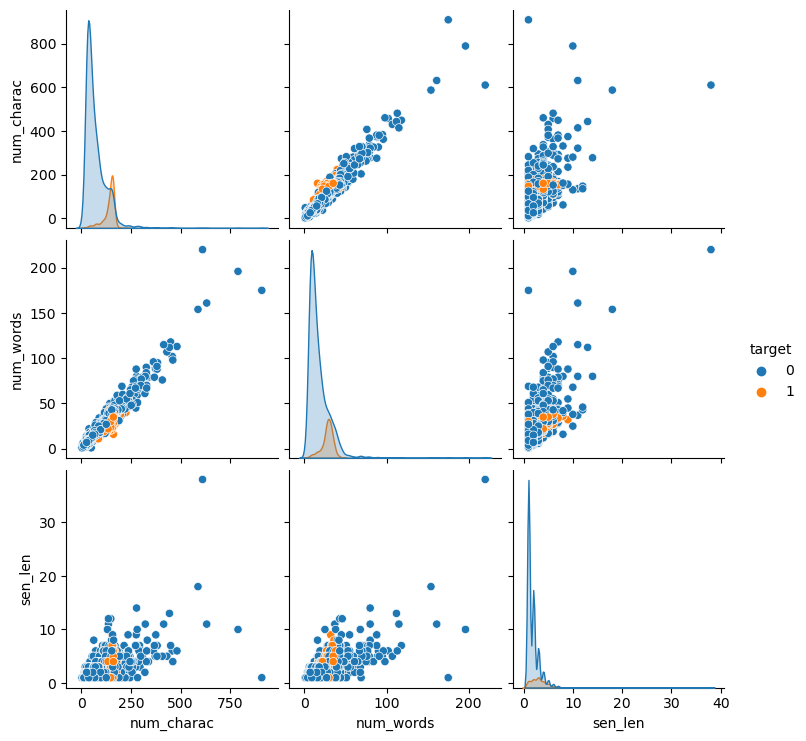

In [31]:
sns.pairplot(data,hue="target")

In [32]:
data2 = data.copy()
data2 = data2.drop("text",axis=1)

In [33]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5169 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   target      5169 non-null   int32
 1   num_charac  5169 non-null   int64
 2   num_words   5169 non-null   int64
 3   sen_len     5169 non-null   int64
dtypes: int32(1), int64(3)
memory usage: 181.7 KB


<Axes: >

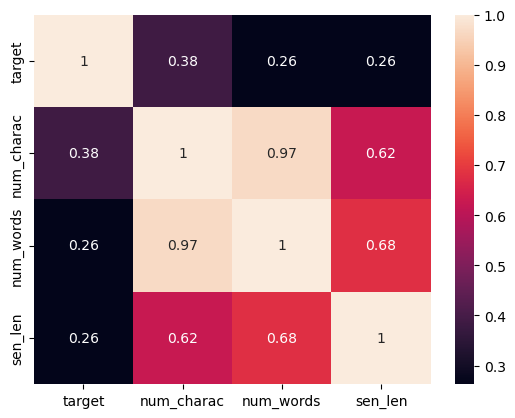

In [34]:
sns.heatmap(data2.corr(),annot=True)

# Data Preprocessing
  Lower case
  
  Tokenization
  
  Removing special Characters
  
  Removing Stop words and punctuation
  
  Stemming
  

In [35]:
def transform_text(text):
    text= text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words("english") and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return y

In [36]:
from nltk.corpus import stopwords
stopwords.words("english")

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [37]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\NITHIISH\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [38]:
import string 
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [39]:
from nltk.stem.porter import PorterStemmer
ps =PorterStemmer()

In [40]:
data["transfoemd_text"]=data.text.apply(transform_text)

In [41]:
data.head()

,target,text,num_charac,num_words,sen_len,transfoemd_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"[go, jurong, point, crazi, avail, bugi, n, gre..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"[ok, lar, joke, wif, u, oni]"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"[free, entri, 2, wkli, comp, win, fa, cup, fin..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"[u, dun, say, earli, hor, u, c, alreadi, say]"
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"[nah, think, goe, usf, live, around, though]"


In [42]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [43]:
data['transfoemd_text'] = data['transfoemd_text'].astype(str)
spam_wc = wc.generate(data[data["target"]==1]["transfoemd_text"].str.cat(sep=" "))

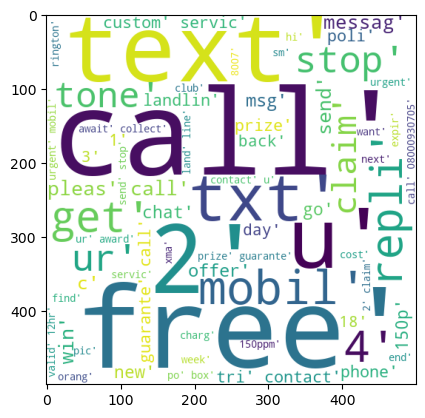

In [44]:
plt.imshow(spam_wc)

In [45]:
data['transfoemd_text'] = data['transfoemd_text'].astype(str)
ham_wc = wc.generate(data[data["target"]==0]["transfoemd_text"].str.cat(sep=" "))

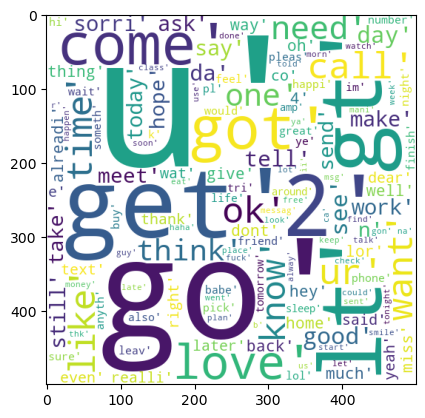

In [46]:
plt.imshow(ham_wc)

In [47]:
data.head()

,target,text,num_charac,num_words,sen_len,transfoemd_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,"['go', 'jurong', 'point', 'crazi', 'avail', 'b..."
1,0,Ok lar... Joking wif u oni...,29,8,2,"['ok', 'lar', 'joke', 'wif', 'u', 'oni']"
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,"['free', 'entri', '2', 'wkli', 'comp', 'win', ..."
3,0,U dun say so early hor... U c already then say...,49,13,1,"['u', 'dun', 'say', 'earli', 'hor', 'u', 'c', ..."
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,"['nah', 'think', 'goe', 'usf', 'live', 'around..."


In [48]:
spam_corps=[]
for i in data[data["target"]==1]["transfoemd_text"].tolist():
    for word in i.split():
        spam_corps.append(word)

In [49]:
len(spam_corps)

9939

In [50]:
spam_corps

["['free',",
 "'entri',",
 "'2',",
 "'wkli',",
 "'comp',",
 "'win',",
 "'fa',",
 "'cup',",
 "'final',",
 "'tkt',",
 "'21st',",
 "'may',",
 "'text',",
 "'fa',",
 "'87121',",
 "'receiv',",
 "'entri',",
 "'question',",
 "'std',",
 "'txt',",
 "'rate',",
 "'c',",
 "'appli',",
 "'08452810075over18']",
 "['freemsg',",
 "'hey',",
 "'darl',",
 "'3',",
 "'week',",
 "'word',",
 "'back',",
 "'like',",
 "'fun',",
 "'still',",
 "'tb',",
 "'ok',",
 "'xxx',",
 "'std',",
 "'chg',",
 "'send',",
 "'rcv']",
 "['winner',",
 "'valu',",
 "'network',",
 "'custom',",
 "'select',",
 "'receivea',",
 "'prize',",
 "'reward',",
 "'claim',",
 "'call',",
 "'claim',",
 "'code',",
 "'kl341',",
 "'valid',",
 "'12',",
 "'hour']",
 "['mobil',",
 "'11',",
 "'month',",
 "'u',",
 "'r',",
 "'entitl',",
 "'updat',",
 "'latest',",
 "'colour',",
 "'mobil',",
 "'camera',",
 "'free',",
 "'call',",
 "'mobil',",
 "'updat',",
 "'co',",
 "'free',",
 "'08002986030']",
 "['six',",
 "'chanc',",
 "'win',",
 "'cash',",
 "'100',",
 "'pound'

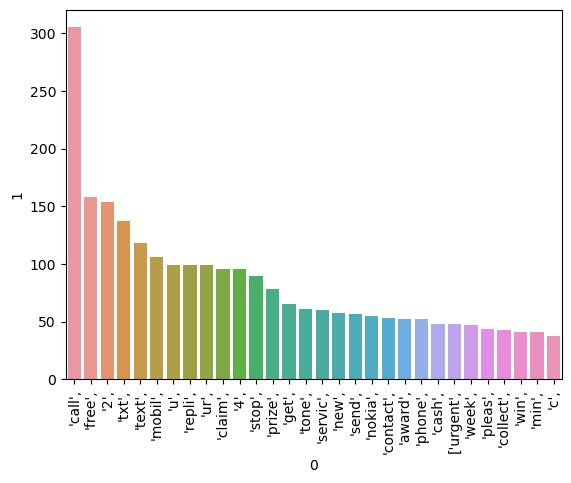

In [51]:
from collections import Counter
data_collection=pd.DataFrame(Counter(spam_corps).most_common(30))
sns.barplot(x=data_collection[0],y=data_collection[1])
plt.xticks(rotation="vertical")
plt.show()

In [52]:
ham_corps=[]
for i in data[data["target"]==0]["transfoemd_text"].tolist():
    for word in i.split():
        ham_corps.append(word)

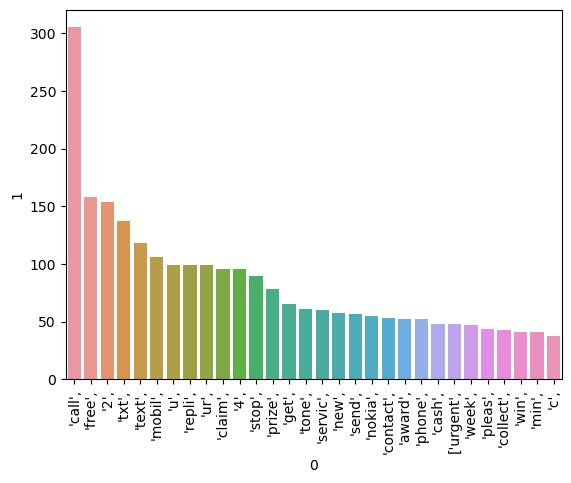

In [53]:
from collections import Counter
data_collection=pd.DataFrame(Counter(spam_corps).most_common(30))
sns.barplot(x=data_collection[0],y=data_collection[1])
plt.xticks(rotation="vertical")
plt.show()

# Model Building

In [54]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tf=TfidfVectorizer()

In [55]:
x = tf.fit_transform(data["transfoemd_text"]).toarray()

In [56]:
x.shape

(5169, 6708)

In [57]:
y=data.target.values

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [59]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [60]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

accuracy score for Gaussian: 0.8762088974854932
Precision score for Gaussian: 0.5231481481481481


<Axes: >

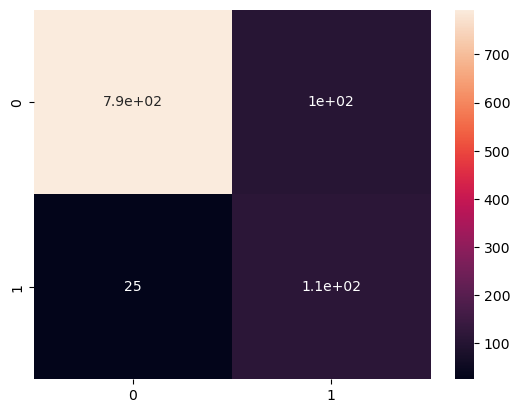

In [61]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print("accuracy score for Gaussian:",accuracy_score(y_test,y_pred1))
print("Precision score for Gaussian:",precision_score(y_test,y_pred1))
cm= confusion_matrix(y_test,y_pred1)
sns.heatmap(cm,annot=True)

accuracy score for multinomial: 0.8762088974854932
Precision score for multinomial: 0.5231481481481481


<Axes: >

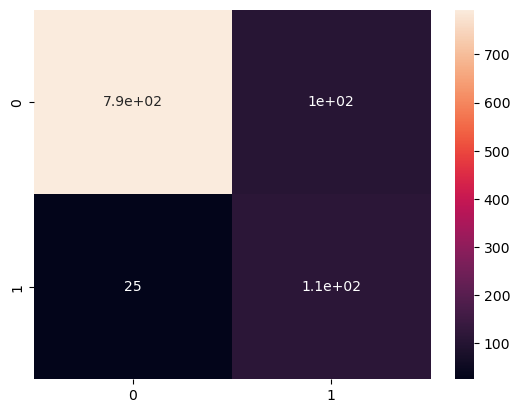

In [62]:
mnb.fit(x_train,y_train)
y_pred2=gnb.predict(x_test)
print("accuracy score for multinomial:",accuracy_score(y_test,y_pred2))
print("Precision score for multinomial:",precision_score(y_test,y_pred2))
cm= confusion_matrix(y_test,y_pred2)
sns.heatmap(cm,annot=True)

accuracy score for bernoulli: 0.9700193423597679
Precision score for bernoulli: 0.9734513274336283


<Axes: >

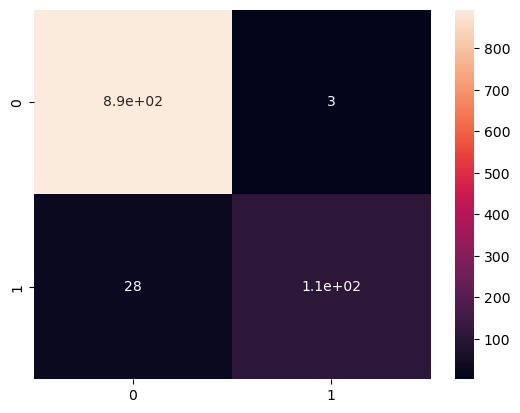

In [63]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print("accuracy score for bernoulli:",accuracy_score(y_test,y_pred3))
print("Precision score for bernoulli:",precision_score(y_test,y_pred3))
cm= confusion_matrix(y_test,y_pred3)
sns.heatmap(cm,annot=True)

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [66]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [67]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred = clf.predict(x_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [68]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.937137330754352
Precision -  0.8543689320388349
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9729206963249516
Precision -  0.9435483870967742


In [69]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [70]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


C:\Users\NITHIISH\anaconda4\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


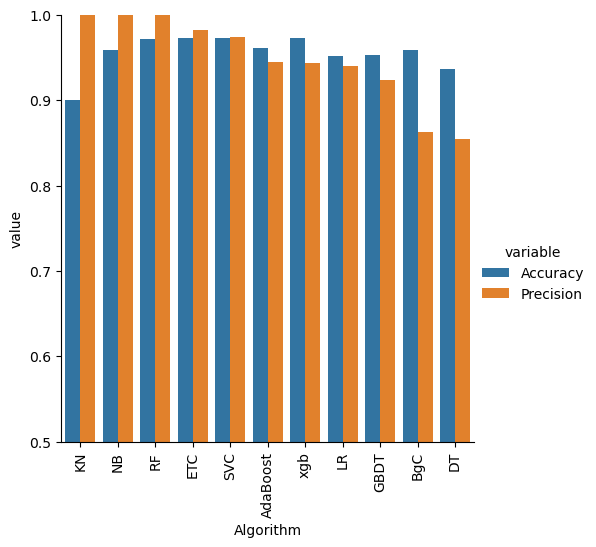

In [71]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [72]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfdf=TfidfVectorizer(max_features=3000)

In [73]:
x = tfdf.fit_transform(data["transfoemd_text"]).toarray()
y = data.target.values

In [78]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
accuracy_scores1 = []
precision_scores1 = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision= train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores1.append(current_accuracy)
    precision_scores1.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [79]:
performance_df3 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores1,'Precision_max_ft_3000':precision_scores1})
performance_df3

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.927466,0.811881
4,LR,0.958414,0.970297
5,RF,0.975822,0.982906
6,AdaBoost,0.960348,0.929204
7,BgC,0.958414,0.868217
8,ETC,0.974855,0.974576
9,GBDT,0.946809,0.919192


In [81]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x=scaler.fit_transform(x)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)
accuracy_scores= []
precision_scores= []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, x_train,y_train,x_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9690522243713733
Precision -  0.9274193548387096
For  KN
Accuracy -  0.9052224371373307
Precision -  0.9761904761904762
For  NB
Accuracy -  0.9787234042553191
Precision -  0.9461538461538461
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9671179883945842
Precision -  0.9642857142857143
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829
For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [82]:
performance_df4 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)
performance_df4

,Algorithm,Accuracy_scaling,Precision_scaling
5,RF,0.975822,0.982906
1,KN,0.905222,0.976190
8,ETC,0.974855,0.974576
4,LR,0.967118,0.964286
2,NB,0.978723,0.946154
6,AdaBoost,0.960348,0.929204
0,SVC,0.969052,0.927419
10,xgb,0.967118,0.926230
9,GBDT,0.946809,0.919192
7,BgC,0.958414,0.868217
